# task2
**Stock Market Prediction And Forecasting.Using Stacked LSTM**

Datasetlinks:

https://raw.githubusercontent.com/ mwitiderrick/stockprice/master/NSE

**Importing all required libraries**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import pandas as pd
import numpy as np
import math 
warnings.filterwarnings('ignore')

**Loading dataset**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/datasets/stockmarket.csv")

In [ ]:
data=data.replace('[^\d.]','',regex=True).astype(float)

In [ ]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,20180928.0,234.05,235.95,230.20,233.50,233.75,3069914.0,7162.35
1,20180927.0,234.55,236.80,231.10,233.80,233.25,5082859.0,11859.95
2,20180926.0,240.00,240.00,232.50,235.00,234.25,2240909.0,5248.60
3,20180925.0,233.30,236.75,232.00,236.25,236.10,2349368.0,5503.90
4,20180924.0,233.55,239.20,230.75,234.00,233.30,3423509.0,7999.55
...,...,...,...,...,...,...,...,...
2030,20100727.0,117.60,119.50,112.00,118.80,118.65,586100.0,694.98
2031,20100726.0,120.10,121.00,117.10,117.10,117.60,658440.0,780.01
2032,20100723.0,121.80,121.95,120.25,120.35,120.65,281312.0,340.31
2033,20100722.0,120.30,122.00,120.25,120.75,120.90,293312.0,355.17


**Displaying information about dataset**

In [ ]:
data.head

<bound method NDFrame.head of             Date    Open    High     Low    Last   Close  \
0     20180928.0  234.05  235.95  230.20  233.50  233.75   
1     20180927.0  234.55  236.80  231.10  233.80  233.25   
2     20180926.0  240.00  240.00  232.50  235.00  234.25   
3     20180925.0  233.30  236.75  232.00  236.25  236.10   
4     20180924.0  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  20100727.0  117.60  119.50  112.00  118.80  118.65   
2031  20100726.0  120.10  121.00  117.10  117.10  117.60   
2032  20100723.0  121.80  121.95  120.25  120.35  120.65   
2033  20100722.0  120.30  122.00  120.25  120.75  120.90   
2034  20100721.0  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                3069914.0          7162.35  
1                5082859.0         11859.95  
2                2240909.0          5248.60  
3                2349368.0          5503.90  
4                34

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   float64
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   float64
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(8)
memory usage: 127.3 KB


In [ ]:
data.describe()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2.035000e+03,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,2.014201e+07,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,2.394201e+04,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,2.010072e+07,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,2.012073e+07,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,2.014081e+07,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,2.016091e+07,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,2.018093e+07,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity           float64
Turnover (Lacs)                float64
dtype: object

**Sorting the data according to data**

In [ ]:
data = data.sort_values('Date')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,1970-01-01 00:00:00.020100721,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2033,1970-01-01 00:00:00.020100722,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2032,1970-01-01 00:00:00.020100723,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2031,1970-01-01 00:00:00.020100726,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2030,1970-01-01 00:00:00.020100727,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


**Plotting graph for date and closing stock**

Text(0, 0.5, 'Close')

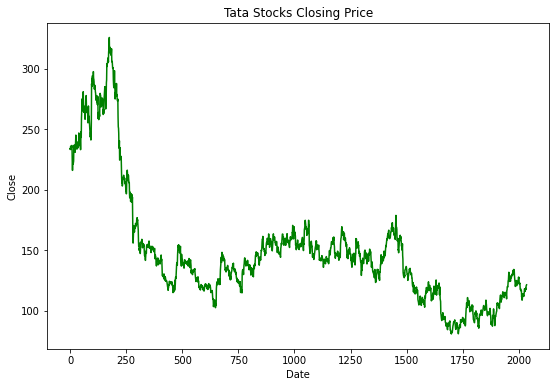

In [ ]:
plt.figure(figsize = (9,6))
plt.title('Tata Stocks Closing Price')
plt.plot(data['Close'],'g')
plt.xlabel('Date',fontsize=10)
plt.ylabel('Close',fontsize=10)

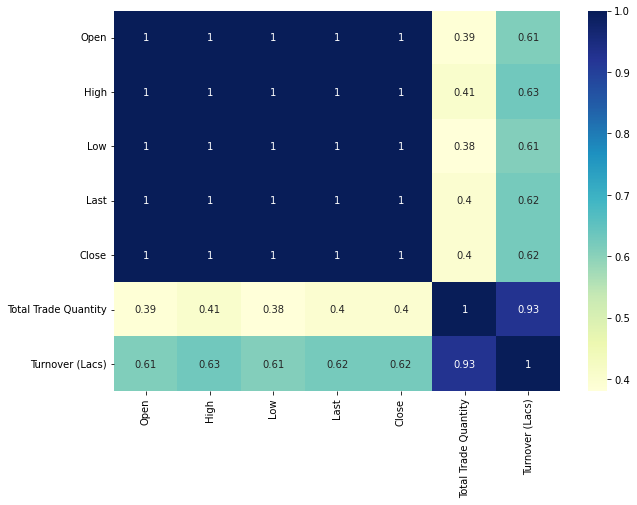

In [ ]:
dcorr = data.corr()
top_corr_features = dcorr.index
plt.figure(figsize=(10,7))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="YlGnBu")

**MinMaxScaler**

In [ ]:
data_close = data.reset_index()['Close']
data_close.head()
scaler = MinMaxScaler(feature_range = (0, 1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1, 1))

In [ ]:
train_size = int(len(data_close)*0.70)
test_size = len(data_close) - train_size
train = data_close[0 : train_size, :]
test = data_close[train_size : len(data_close), :1]

**creating a matrix**

In [ ]:
def create_matrix(ds, time_step=1):
    dataX, dataY = [], []
    for i in range(len(ds)-time_step-1):
        data = ds[i:(i+time_step),0]
        dataX.append(data)
        dataY.append(ds[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [ ]:
step=100 
X_train, y_train = create_matrix(train, step)
X_test, y_test = create_matrix(test, step)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1323, 100) (1323,)
(510, 100) (510,)


**Splitting data**

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=77, batch_size=64, verbose=1, shuffle=True).history

Epoch 1/77
19/19 [==============================] - 12s 300ms/step - loss: 0.0109 - val_loss: 0.0014
Epoch 2/77
19/19 [==============================] - 8s 426ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 3/77
19/19 [==============================] - 5s 290ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 4/77
19/19 [==============================] - 4s 194ms/step - loss: 8.9875e-04 - val_loss: 0.0012
Epoch 5/77
19/19 [==============================] - 4s 192ms/step - loss: 8.2538e-04 - val_loss: 0.0011
Epoch 6/77
19/19 [==============================] - 4s 225ms/step - loss: 8.0418e-04 - val_loss: 0.0011
Epoch 7/77
19/19 [==============================] - 4s 194ms/step - loss: 7.7137e-04 - val_loss: 0.0010
Epoch 8/77
19/19 [==============================] - 5s 251ms/step - loss: 7.5149e-04 - val_loss: 9.6670e-04
Epoch 9/77
19/19 [==============================] - 5s 281ms/step - loss: 7.1248e-04 - val_loss: 0.0010
Epoch 10/77
19/19 [==============================] - 6s 292ms/step - lo

**Predicting the model**

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 [==============================] - 1s 41ms/step


**Reversing the MinMax Scaler**

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
math.sqrt(mean_squared_error(y_train, train_predict))
math.sqrt(mean_squared_error(y_test,test_predict))

205.3708341093126

**Visualise the Predictions**


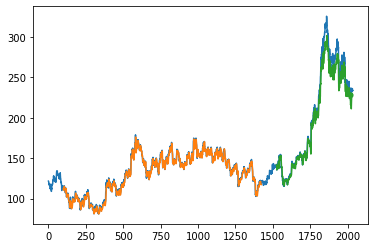

In [ ]:
look_back = 100
train_num_pyredict_plot = np.empty_like(data_close)
train_num_pyredict_plot[:, :] = np.nan
train_num_pyredict_plot[look_back : len(train_predict) + look_back, :] = train_predict
test_predict_plot = np.empty_like(data_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1 : len(data_close) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(data_close))
plt.plot(train_num_pyredict_plot)
plt.plot(test_predict_plot)
plt.show()

**Future Prediction Model**

In [ ]:
x_inum_pyut=test[307:].reshape(1, -1)
x_inum_pyut.shape
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()

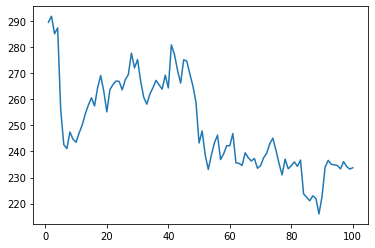

In [ ]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)
plt.plot(day_new, scaler.inverse_transform(data_close[1935 : ]))